In [1]:
# Crear una instancia del ambiente
import numpy as np
import matplotlib.pyplot as plt
from agente import AgenteQLearning
from DQN import AgenteDQN
from ambiente import AmbienteDiezMil
from template import Validador
from jugador import JugadorFromDQNPolicy
from IPython.display import clear_output
from tqdm import tqdm

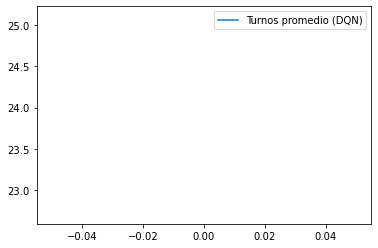

  0%|          | 1/1000 [00:13<3:43:15, 13.41s/it]

2.145000696182251
0.005322458688169718
0.012471604160964489
0.024565445259213448
1.712344765663147
0.0031768425833433867
1.5042797327041626
0.3443327844142914
0.016666855663061142
1.0834848880767822
0.0651983991265297
19.426332473754883
1.109336495399475
0.11006812006235123
0.022290384396910667
2.3151917457580566
0.00380293233320117
0.27016061544418335
0.13320712745189667
1.8389655351638794
0.0263806264847517
2.224055528640747
0.07600513845682144
0.01931377500295639
0.07010023295879364
2.028524398803711
0.03202676773071289
1.5904372930526733
0.8425707817077637
0.01610509306192398
13.491999626159668
0.41056501865386963
13.48022174835205
0.3351823389530182
1.4611190557479858
0.007575430907309055
12.126991271972656
0.3900056779384613
12.641810417175293
0.1794593334197998
29.29620361328125
0.04848124831914902
0.7875425815582275
0.047857269644737244
2.880969524383545
2.264204740524292
0.35846877098083496
4.365939140319824
0.016859985888004303
4.081541538238525
0.00021718611242249608
0.71321

  0%|          | 2/1000 [00:26<3:41:03, 13.29s/it]

6.933674012543634e-05
17.059185028076172
0.059611666947603226
3.6009247303009033
0.14961855113506317
3.6338610649108887
2.9223411083221436
0.4176330864429474
4.784287452697754
0.3728446364402771
3.155884265899658
0.2337401807308197
15.24569034576416
0.005116677843034267
15.791786193847656
0.004518416244536638
0.07910135388374329
0.014341270551085472
0.9387804269790649
0.2712131440639496
0.11652098596096039
0.5063313245773315
0.12349773198366165
0.45912158489227295
0.09461143612861633
5.217649936676025
0.2603103220462799
3.851825475692749
0.009916415438055992
3.7162187099456787
0.000875196245033294
2.688129186630249
0.06485173106193542
21.907180786132812
1.2706154584884644
0.023649126291275024
0.7096766829490662
2.4930930137634277
0.03062327206134796
1.951940894126892
0.08872953802347183
5.502442945726216e-07
0.09279820322990417
2.525969982147217
0.0003974091087002307
0.17487706243991852
0.0025931349955499172
0.08522626012563705
8.675276330905035e-05
0.038360390812158585
2.2265019416809

  0%|          | 3/1000 [00:39<3:35:32, 12.97s/it]

0.1177515983581543
2.256479263305664
0.8061575293540955
0.14438362419605255
1.1572948694229126
0.05351429805159569
0.03566034138202667
0.07999908179044724
3.014631509780884
0.1303713172674179
0.05967951938509941
1.8230152130126953
0.5261296033859253
0.004093388095498085
0.8829563856124878
0.29079532623291016
0.06668762862682343
0.7774613499641418
0.8084841966629028
0.2100834995508194
0.07922733575105667
0.6751183271408081
0.6611508727073669
0.903960108757019
0.08854884654283524
0.9470415711402893
7.6004838943481445
0.6196190118789673
0.7785534262657166
2.2607316970825195
0.8478032350540161
25.02515983581543
1.190026044845581
0.13962365686893463
0.0719635933637619
0.0474122017621994
0.007858822122216225
0.38525301218032837
0.025602662935853004
0.027518147602677345
1.5161867141723633
3.1513242721557617
0.9163456559181213
0.7038668990135193
28.892440795898438
25.929990768432617
2.248835563659668
0.4016079008579254
0.12144272029399872
0.007339471951127052
1.2110841274261475
1.7192770242691

  0%|          | 3/1000 [00:50<4:40:50, 16.90s/it]

0.7338478565216064
3.2624199390411377
9.118284225463867
0.028267759829759598
1.7297337055206299
0.5431998372077942
0.02708182856440544
0.0030300409998744726
20.067787170410156
1.792930006980896
0.027483705431222916
1.0992001295089722
0.9987131953239441
1.3480854034423828


KeyboardInterrupt: 

In [2]:
# Inicialización del gráfico
plt.ion()  # Activa el modo interactivo
seed = 42
np.random.seed(seed)

ambiente = AmbienteDiezMil()

# Crear un agente de Q-learning
# agente = AgenteQLearning(ambiente, alpha=0.001, gamma=0.1, epsilon=0.05)
agente_smart = AgenteDQN(ambiente)
episodios = 100
epochs = 1000

vals_normal = []
vals_smart = []

# Entrenar al agente con un número de episodios
for _ in tqdm(range(epochs)):
    # agente.entrenar(episodios, verbose=False)
    agente_smart.entrenar(episodios, verbose=False)
    validador = Validador(ambiente)
    if _ % 10 == 0:
        # vals_normal.append(validador.validar_politica(agente.q_table2pol(), 100))
        agente_smart.guardar_politica('policy_net.pth')
        jugador = JugadorFromDQNPolicy('policy_net.pth')
        vals_smart.append(validador.validar_jugador(jugador, 100))
        clear_output(wait=True)
        # plt.plot(vals_normal, label=f"Turnos promedio (lr: {agente.alpha:.4f})")
        plt.plot(vals_smart, label="Turnos promedio (DQN)")
        plt.legend()
        plt.show()

plt.ioff()  # Desactiva el modo interactivo

In [4]:
from jugador import JugadorAleatorio
from template import Validador


val = Validador(ambiente)
val_count = 1000
avg = val.validar_politica(agente.q_table2pol(), val_count)
print(f"Validación DeepPurple: {avg}")

val_rand = Validador(ambiente)
jugador = JugadorAleatorio("random")
avg_rand = val_rand.validar_jugador(jugador, val_count)
print(f"Validación Random: {avg_rand}")

Validación DeepPurple: 25.066
Validación Random: 26.927


In [ ]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display


ambiente = AmbienteDiezMil()

# Crear un agente de Q-learning
agente = AgenteQLearning(ambiente)

vals = []

for i, val in enumerate(agente.entrenar(episodios, verbose=True)):
    vals.append(val)
    plt.figure(figsize=(10, 5))
    plt.plot(vals)
    display.clear_output(wait=True)
    # display.display(pl.gcf())
    plt.show()